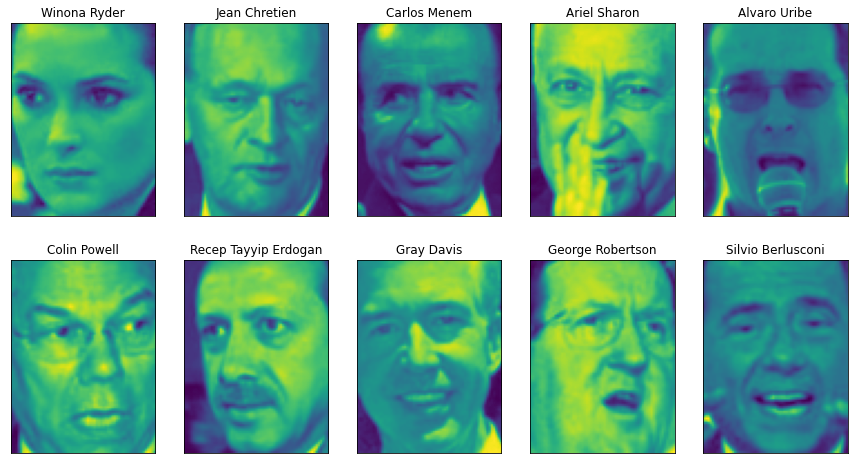

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [3]:
print("People, images, shape: ", format(people.images.shape))
print("Number of classes: ", format(len(people.target_names)))

People, images, shape:  (3023, 87, 65)
Number of classes:  62


In [4]:
import numpy as np
#count how ofter each target appears
counts = np.bincount(people.target)
#print name next to each target name
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end= ' ')
    if(i+1)%3 ==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [5]:
# to make data less skewed, will take up to 50 images of each person
mask = np.zeros(people.target.shape, dtype= bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
X_people = people.data[mask]
y_people = people.target[mask]


In [6]:
# scale the grayscale value to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people /255

In [7]:
#using kneighboursclassifier to train the data to scan each training example per class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test score", format(knn.score(X_test, y_test)))

Test score 0.23449612403100775


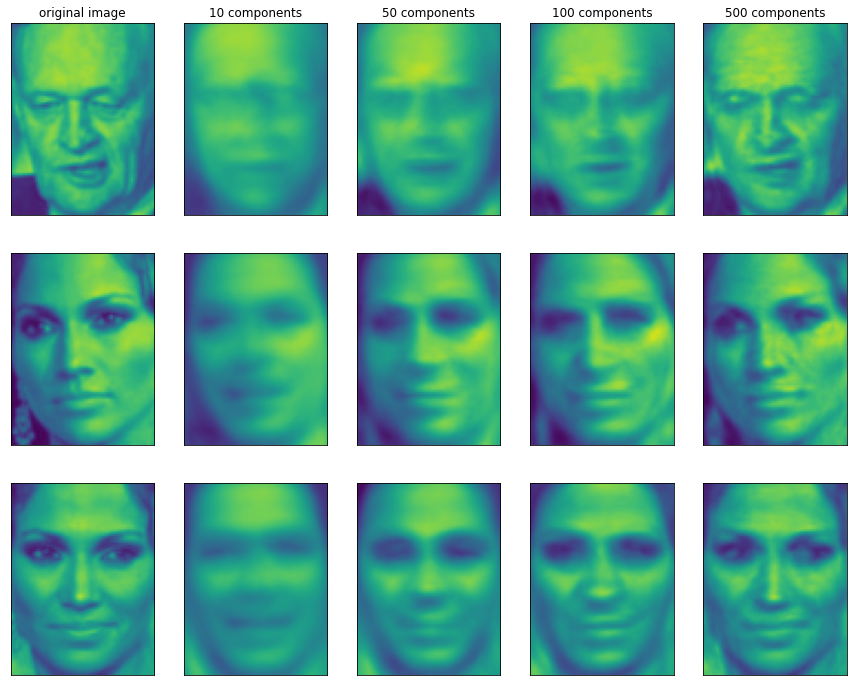

In [8]:
import mglearn
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [9]:
'''
1. The quality of the backend transformed data is similar to when using PCA, but slighly worse.
2. As PCA finds the optimum directions in terms of recontruction. 
3. NMF is usualy not used for its ability to reonstruct, but rather for finding intresting patterns within the data.
'''

'\n1. The quality of the backend transformed data is similar to when using PCA, but slighly worse.\n2. As PCA finds the optimum directions in terms of recontruction. \n3. NMF is usualy not used for its ability to reonstruct, but rather for finding intresting patterns within the data.\n'

C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


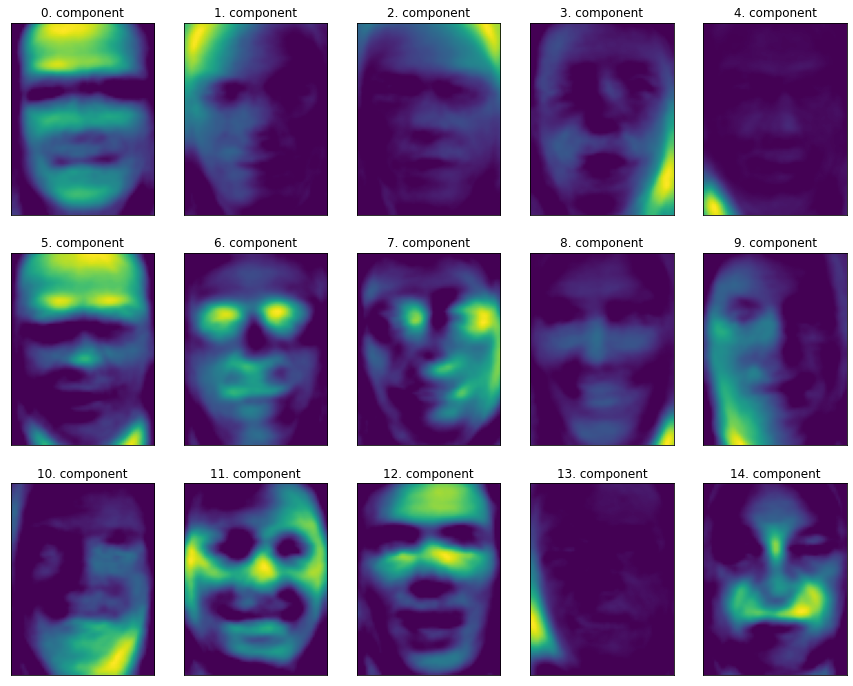

In [10]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fig, axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks': (),'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [ ]:
'''
1. All the above components are positive and resemble prototypes of face  much more than the faces shown by PCA.
2. It can be observed that component 3 shows a face rotated to the right and component 7 the component rotated to the left/
'''

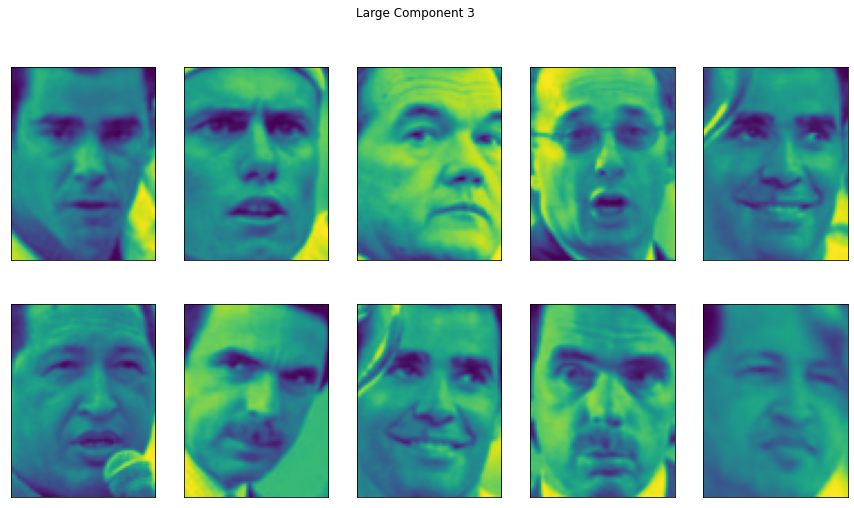

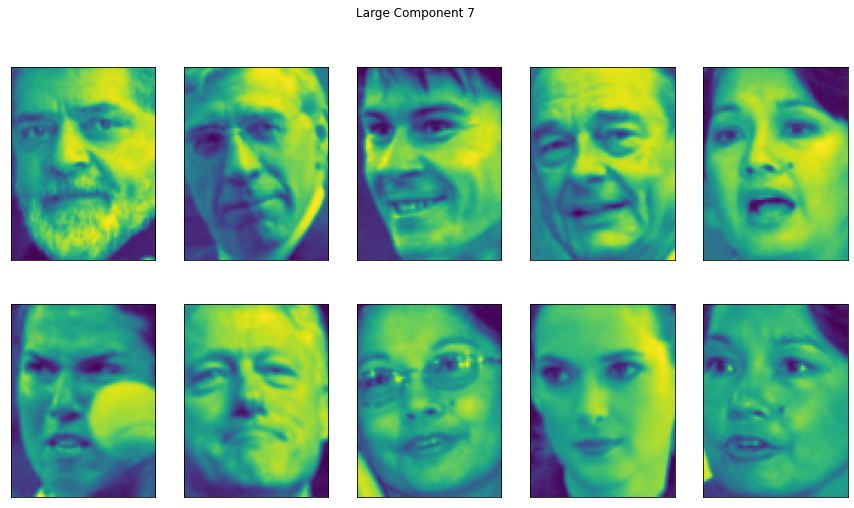

In [13]:
compn = 3
#sort by comp 3, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large Component 3")
for i, (ind, ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
#sort by comp 7, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large Component 7")
for i, (ind, ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
'''
1. As expected faces that have a high coefficient for component 3 are faces looking to the right
2. While faces with a high coefficent for component 7 are looking to the left.
3. So NMF best fits for extracting patterns like data with additive structures, including audio, gene expressions and text data.
'''